In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_excel('COINS.xlsx')
data.to_csv("Coins.csv", index=True)
print(data)

data['Date'] = pd.to_datetime(data['Date'])

data = data.sort_values('Date')

print(data.head())



          Date      ETH-USD   ARB-USD   LINK-USD
0   2023-06-06  1811.828369  1.137949   6.065950
1   2023-06-07  1884.494873  1.186590   6.260660
2   2023-06-08  1832.395996  1.126181   5.914067
3   2023-06-09  1846.301880  1.129984   5.995314
4   2023-06-10  1840.225220  1.130772   5.986427
..         ...          ...       ...        ...
373 2024-06-13  3559.730000  0.972900  16.000000
374 2024-06-14  3467.970000  0.936600  15.140000
375 2024-06-15  3479.790000  0.912100  14.740000
376 2024-06-16  3566.760000  0.921700  14.860000
377 2024-06-17  3622.380000  0.923700  15.130000

[378 rows x 4 columns]
        Date      ETH-USD   ARB-USD  LINK-USD
0 2023-06-06  1811.828369  1.137949  6.065950
1 2023-06-07  1884.494873  1.186590  6.260660
2 2023-06-08  1832.395996  1.126181  5.914067
3 2023-06-09  1846.301880  1.129984  5.995314
4 2023-06-10  1840.225220  1.130772  5.986427


In [2]:
data

,Date,ETH-USD,ARB-USD,LINK-USD
0,2023-06-06,1811.828369,1.137949,6.065950
1,2023-06-07,1884.494873,1.186590,6.260660
2,2023-06-08,1832.395996,1.126181,5.914067
3,2023-06-09,1846.301880,1.129984,5.995314
4,2023-06-10,1840.225220,1.130772,5.986427
...,...,...,...,...
373,2024-06-13,3559.730000,0.972900,16.000000
374,2024-06-14,3467.970000,0.936600,15.140000
375,2024-06-15,3479.790000,0.912100,14.740000
376,2024-06-16,3566.760000,0.921700,14.860000


In [3]:
def calculate_metrics(df, token_name):
    metrics = {}
    variance = df[token_name].var()
    metrics['Variance'] = variance
    df['Daily Range'] = df[token_name] - df[token_name].shift(1)
    average_daily_range = df['Daily Range'].mean()
    metrics['Average Daily Range'] = average_daily_range

    df['Daily Return'] = df[token_name].pct_change()
    average_daily_return = df['Daily Return'].mean()
    metrics['Average Daily Return'] = average_daily_return

    volatility = df['Daily Return'].std()
    metrics['Volatility'] = volatility

    return metrics

eth_metrics = calculate_metrics(data, 'ETH-USD')
arb_metrics = calculate_metrics(data, 'ARB-USD')
link_metrics = calculate_metrics(data, 'LINK-USD')

In [4]:
print("ETH Metrics:", eth_metrics)
print("ARB Metrics:", arb_metrics)
print("LINK Metrics:", link_metrics)

ETH Metrics: {'Variance': 545498.1155741072, 'Average Daily Range': 4.802524220159151, 'Average Daily Return': 0.0022295473888789717, 'Volatility': 0.02823807536895973}
ARB Metrics: {'Variance': 0.14996710039606873, 'Average Daily Range': -0.000568299734748011, 'Average Daily Return': 0.0003480311522765131, 'Volatility': 0.04295952660321419}
LINK Metrics: {'Variance': 24.37278430915182, 'Average Daily Range': 0.024042572944297083, 'Average Daily Return': 0.0032889135427626856, 'Volatility': 0.041935414951132365}


Correlation Matrix:
                  Date   ETH-USD   ARB-USD  LINK-USD  Daily Range  \
Date          1.000000  0.877423  0.367405  0.849042    -0.032774   
ETH-USD       0.877423  1.000000  0.482331  0.818139    -0.049324   
ARB-USD       0.367405  0.482331  1.000000  0.669039     0.027374   
LINK-USD      0.849042  0.818139  0.669039  1.000000     0.039147   
Daily Range  -0.032774 -0.049324  0.027374  0.039147     1.000000   
Daily Return -0.040579 -0.057369  0.007907  0.022299     0.938979   

              Daily Return  
Date             -0.040579  
ETH-USD          -0.057369  
ARB-USD           0.007907  
LINK-USD          0.022299  
Daily Range       0.938979  
Daily Return      1.000000  

Strongest Correlation:
0.9389790458881425

Weakest Correlation:
-0.0493244050071905


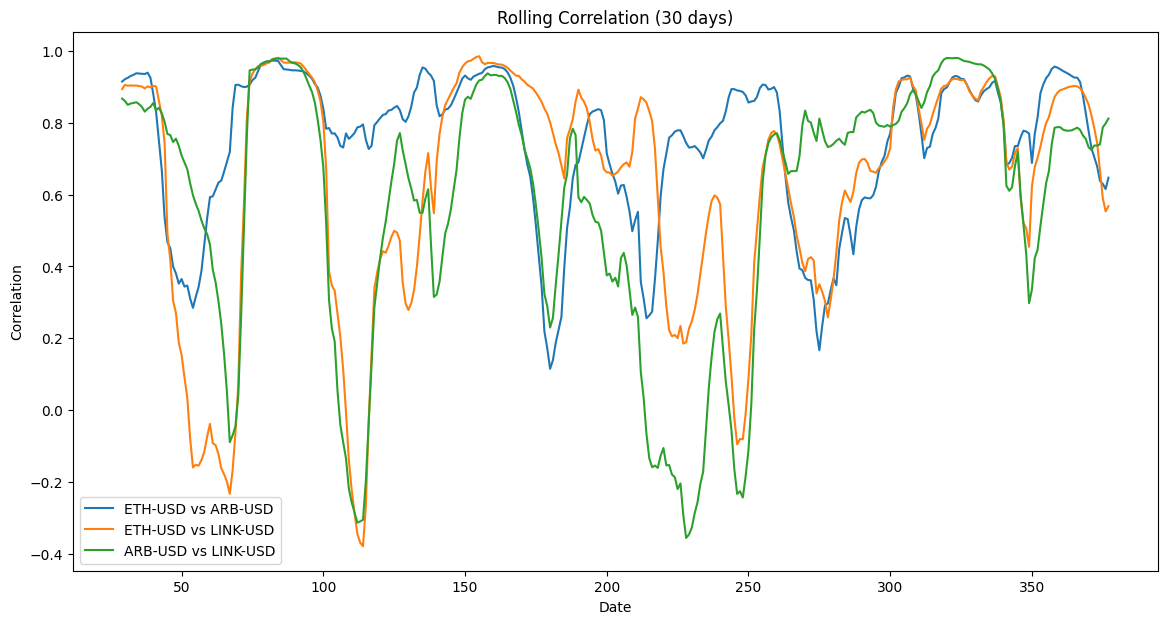

In [5]:
correlation_matrix = data.corr()

strongest_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().iloc[1]
weakest_correlation = correlation_matrix.unstack().sort_values().drop_duplicates().iloc[1]

print("Correlation Matrix:")
print(correlation_matrix)
print("\nStrongest Correlation:")
print(strongest_correlation)
print("\nWeakest Correlation:")
print(weakest_correlation)

rolling_correlation_eth_arb = data['ETH-USD'].rolling(window=30).corr(data['ARB-USD'])
rolling_correlation_eth_link = data['ETH-USD'].rolling(window=30).corr(data['LINK-USD'])
rolling_correlation_arb_link = data['ARB-USD'].rolling(window=30).corr(data['LINK-USD'])

plt.figure(figsize=(14, 7))
plt.plot(rolling_correlation_eth_arb, label='ETH-USD vs ARB-USD')


plt.plot(rolling_correlation_eth_link, label='ETH-USD vs LINK-USD')
plt.plot(rolling_correlation_arb_link, label='ARB-USD vs LINK-USD')
plt.title('Rolling Correlation (30 days)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lagged_data = data.copy()
lagged_data['ETH-USD_vs_ARB-USD'] = rolling_correlation_eth_arb.shift(1)
lagged_data['ETH-USD_vs_LINK-USD'] = rolling_correlation_eth_link.shift(1)
lagged_data['ARB-USD_vs_LINK-USD'] = rolling_correlation_arb_link.shift(1)

lagged_data.dropna(inplace=True)

X = lagged_data[['ETH-USD_vs_ARB-USD', 'ETH-USD_vs_LINK-USD', 'ARB-USD_vs_LINK-USD']]
y = lagged_data['ETH-USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
y_train

30     1910.588013
31     1848.636475
32     1870.602539
33     1865.539551
34     1863.009766
          ...     
303    3311.441895
304    3330.040527
305    3318.885254
306    3354.183838
307    3453.494629
Name: ETH-USD, Length: 278, dtype: float64

Mean Squared Error for ETH: 13149.274918979148
Mean Squared Error for ARB: 0.0031808891879725534
Mean Squared Error for LINK: 0.4082995002759137


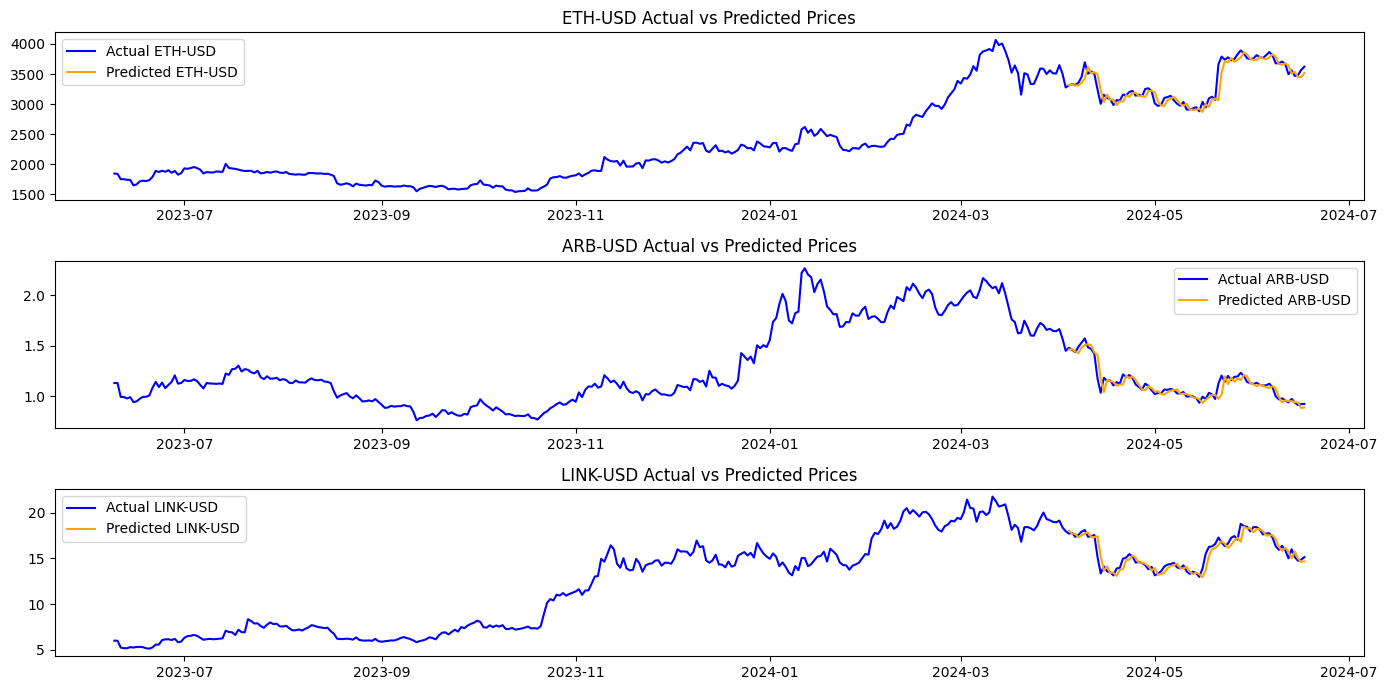

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

data = data.sort_values('Date')

data.set_index('Date', inplace=True)

for col in ['ETH-USD', 'ARB-USD', 'LINK-USD']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)
    data[f'{col}_lag3'] = data[col].shift(3)

data.dropna(inplace=True)

features = ['ETH-USD_lag1', 'ETH-USD_lag2', 'ETH-USD_lag3',
            'ARB-USD_lag1', 'ARB-USD_lag2', 'ARB-USD_lag3',
            'LINK-USD_lag1', 'LINK-USD_lag2', 'LINK-USD_lag3']

X = data[features]
y_eth = data['ETH-USD']
y_arb = data['ARB-USD']
y_link = data['LINK-USD']

X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(X, y_eth, test_size=0.2, shuffle=False)
X_train_arb, X_test_arb, y_train_arb, y_test_arb = train_test_split(X, y_arb, test_size=0.2, shuffle=False)
X_train_link, X_test_link, y_train_link, y_test_link = train_test_split(X, y_link, test_size=0.2, shuffle=False)

model_eth = LinearRegression()
model_eth.fit(X_train_eth, y_train_eth)

model_arb = LinearRegression()
model_arb.fit(X_train_arb, y_train_arb)

model_link = LinearRegression()
model_link.fit(X_train_link, y_train_link)

predictions_eth = model_eth.predict(X_test_eth)
mse_eth = mean_squared_error(y_test_eth, predictions_eth)
print(f"Mean Squared Error for ETH: {mse_eth}")

predictions_arb = model_arb.predict(X_test_arb)
mse_arb = mean_squared_error(y_test_arb, predictions_arb)
print(f"Mean Squared Error for ARB: {mse_arb}")

predictions_link = model_link.predict(X_test_link)
mse_link = mean_squared_error(y_test_link, predictions_link)
print(f"Mean Squared Error for LINK: {mse_link}")

plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(data.index, data['ETH-USD'], label='Actual ETH-USD', color='blue')
plt.plot(y_test_eth.index, predictions_eth, label='Predicted ETH-USD', color='orange')
plt.legend()
plt.title('ETH-USD Actual vs Predicted Prices')

plt.subplot(3, 1, 2)
plt.plot(data.index, data['ARB-USD'], label='Actual ARB-USD', color='blue')
plt.plot(y_test_arb.index, predictions_arb, label='Predicted ARB-USD', color='orange')
plt.legend()
plt.title('ARB-USD Actual vs Predicted Prices')

plt.subplot(3, 1, 3)
plt.plot(data.index, data['LINK-USD'], label='Actual LINK-USD', color='blue')
plt.plot(y_test_link.index, predictions_link, label='Predicted LINK-USD', color='orange')
plt.legend()
plt.title('LINK-USD Actual vs Predicted Prices')

plt.tight_layout()
plt.show()



In [8]:
future_date = pd.to_datetime('2024-06-18')
last_row = data.iloc[-1]

future_features = np.array([
    last_row['ETH-USD'], last_row['ETH-USD_lag1'], last_row['ETH-USD_lag2'],
    last_row['ARB-USD'], last_row['ARB-USD_lag1'], last_row['ARB-USD_lag2'],
    last_row['LINK-USD'], last_row['LINK-USD_lag1'], last_row['LINK-USD_lag2']
]).reshape(1, -1)

eth_future_price = model_eth.predict(future_features)
arb_future_price = model_arb.predict(future_features)
link_future_price = model_link.predict(future_features)

print(f"Predicted ETH price on June 18, 2024: {eth_future_price[0]}")
print(f"Predicted ARB price on June 18, 2024: {arb_future_price[0]}")
print(f"Predicted LINK price on June 18, 2024: {link_future_price[0]}")

Predicted ETH price on June 18, 2024: 3574.953187877804
Predicted ARB price on June 18, 2024: 0.8981862470325696
Predicted LINK price on June 18, 2024: 14.888824870389078


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
